<a href="https://colab.research.google.com/github/231fa04248/image-text-audio/blob/main/image_text_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install gtts

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.2.0
    Uninstalling click-8.2.0:
      Successfully uninstalled click-8.2.0


In [3]:
from gtts import gTTS


In [4]:
text='hello '

In [6]:
lang='en'

In [7]:
res=gTTS(text=text,lang=lang,slow=False)

In [8]:
res.save('audio.mp3')

In [10]:
pip install SpeechRecognition


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 59.5 MB/s eta 0:00:00


In [12]:
import speech_recognition as sr


In [13]:
model=sr.Recognizer()

In [14]:
pip install pydub

In [16]:
mp3_file=r'/content/audio.mp3'
from pydub import AudioSegment
from pydub.playback import play
audio=AudioSegment.from_mp3(mp3_file)
audio.export("temp.wav",format="wav")

<_io.BufferedRandom name='temp.wav'>

In [17]:
audio_file=r'/content/temp.wav'
with sr.AudioFile(audio_file) as source:

  audio_data=model.record(source)
  text=model.recognize_google(audio_data)
text

'hello'

In [19]:
pip install pytesseract pillow

In [22]:
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt


In [26]:
image_path=r'/content/nn'

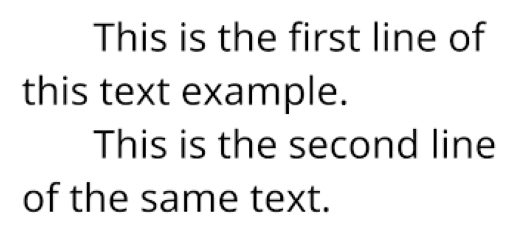

In [27]:
plt.imshow(Image.open(image_path))
plt.axis('off')
plt.show()

In [28]:
img=Image.open(image_path)
text=pytesseract.image_to_string(img)
print("extracted text from image")
print(text)

extracted text from image
This is the first line of
this text example.

This is the second line
of the same text.



In [33]:
from PIL import Image
import pytesseract
from gtts import gTTS
image = Image.open('/content/pp')
extracted_text = pytesseract.image_to_string(image)
tts = gTTS(extracted_text, lang='en')
tts.save('output.mp3')

print("Audio saved as output.mp3")


Audio saved as output.mp3


In [34]:
from PIL import Image
import pytesseract
from gtts import gTTS
import re

# Step 1: Extract text from image
image = Image.open('/content/nn')  # Replace with your image path
extracted_text = pytesseract.image_to_string(image)

# Step 2: Find arithmetic expressions using regex (supports numbers, +, -, *, /, parentheses)
pattern = r'\b\d+(?:\s*[-+*/]\s*\d+)+(?:\s*[-+*/]\s*\d+)*\b'

matches = re.findall(pattern, extracted_text)
results = []

# Step 3: Evaluate the expressions
for expr in matches:
    expr = expr.strip()
    try:
        result = eval(expr)
        results.append(f"{expr} = {result}")
    except:
        pass  # Skip malformed expressions

# Step 4: Combine original text with results
final_text = extracted_text.strip()
if results:
    final_text += "\n\nResults of detected arithmetic operations:\n" + "\n".join(results)
tts = gTTS(final_text, lang='en')
tts.save('output.mp3')

print("Audio saved as output.mp3")


Audio saved as output.mp3


In [35]:
from PIL import Image
import pytesseract
from gtts import gTTS
import re

# Step 1: Extract text from image
image = Image.open('/content/pp')  # Replace with your image path
extracted_text = pytesseract.image_to_string(image)

# Step 2: Find arithmetic expressions using regex
pattern = r'\b\d+(?:\s*[-+*/]\s*\d+)+(?:\s*[-+*/]\s*\d+)*\b'
matches = re.findall(pattern, extracted_text)
results = []

# Step 3: Evaluate expressions
for expr in matches:
    expr = expr.strip()
    try:
        result = eval(expr)
        results.append(f"{expr} = {result}")
    except:
        pass

# Step 4: Combine text and results
final_text = extracted_text.strip()
if results:
    final_text += "\n\nResults of detected arithmetic operations:\n" + "\n".join(results)

# ✅ Step 5: Save text to .txt file
with open("output.txt", "w") as file:
    file.write(final_text)

# ✅ Also print the output
print("Extracted Text with Results:")
print(final_text)
tts = gTTS(final_text, lang='en')
tts.save('output.mp3')
print("Audio saved as output.mp3")
print("Text saved as output.txt")


Extracted Text with Results:
Simplify the expression:

(7a* — 10a? — 32x) — (x* — 26a” — 3a + 17)

Start Solving
Audio saved as output.mp3
Text saved as output.txt


In [36]:
import speech_recognition as sr
import re
from pydub import AudioSegment
from google.colab import files

# Upload and convert MP3 to WAV
def upload_and_convert():
    uploaded = files.upload()  # Upload MP3
    audio_file_mp3 = list(uploaded.keys())[0]
    audio_file_wav = "/content/Q.mp3"
    try:
        audio = AudioSegment.from_mp3(audio_file_mp3)
        audio.export(audio_file_wav, format="wav")
        print(f"File converted to WAV successfully: {audio_file_wav}")
        return audio_file_wav
    except Exception as e:
        print(f"Error converting MP3 to WAV: {e}")
        return None

# Convert words like "plus" to "+", "minus" to "-", etc.
def words_to_expression(text):
    replacements = {
        "plus": "+",
        "minus": "-",
        "times": "*",
        "multiplied by": "*",
        "x": "*",
        "divided by": "/",
        "over": "/"
    }

    # Replace words with symbols
    for word, symbol in replacements.items():
        text = text.lower().replace(word, symbol)

    # Remove non-expression parts (optional, depends on accuracy)
    text = re.findall(r"[\d+\-*/.]+", text.replace(" ", ""))
    return "".join(text)

# Speech recognition and evaluation
def recognize_and_solve(audio_file_wav):
    recognizer = sr.Recognizer()

    try:
        with sr.AudioFile(audio_file_wav) as source:
            audio_data = recognizer.record(source)
        text = recognizer.recognize_google(audio_data)
        print(f"Transcribed Text: {text}")

        # Convert spoken text into valid math expression
        expression = words_to_expression(text)
        print(f"Evaluated Expression: {expression}")

        # Evaluate using eval() safely
        try:
            result = eval(expression)
            print(f"The answer is: {result}")
        except Exception as eval_err:
            print(f"Error evaluating expression: {eval_err}")

    except sr.UnknownValueError:
        print("Could not understand the audio.")
    except sr.RequestError as e:
        print(f"Speech recognition service error: {e}")

# Main control
def main():
    audio_file_wav = upload_and_convert()
    if audio_file_wav:
        recognize_and_solve(audio_file_wav)
main()



Saving Q.mp3 to Q (1).mp3
File converted to WAV successfully: /content/Q.mp3
Transcribed Text: 5 + 5 is what
Evaluated Expression: 5+5
The answer is: 10


In [37]:
!pip install gtts

from gtts import gTTS

text ="5+5"

lang ="en"
res = gTTS(text=text,lang=lang,slow=False)

res.save("ta.mp3")

# Step 1: Install required libraries (run in a notebook or script)
!pip install SpeechRecognition pydub gTTS


# Step 2: Import libraries
import speech_recognition as sr
from pydub import AudioSegment
from gtts import gTTS
import re


# Step 3: Convert MP3 to WAV (SpeechRecognition needs WAV)
mp3_file = r'/content/ta.mp3'
audio = AudioSegment.from_file(mp3_file)
audio.export("temp.wav", format="wav")


# Step 4: Transcribe audio
recognizer = sr.Recognizer()
with sr.AudioFile("temp.wav") as source:
    audio_data = recognizer.record(source)
    text = recognizer.recognize_google(audio_data)

print("Recognized text:", text)


# Step 5: Detect and evaluate math expression like "5 + 5"
expression_match = re.search(r'(\d+)\s*[\+\-\*/]\s*(\d+)', text)
if expression_match:
    expression = expression_match.group(0)
    try:
        result = eval(expression)
        answer_text = f"The answer is {result}"
    except Exception as e:
        answer_text = "Sorry, I could not evaluate that expression"
else:
    answer_text = "No valid math expression found"

print("Answer:", answer_text)


# Step 6: Convert the answer to speech and save it
tts = gTTS(answer_text)
tts.save("/content/answer.mp3")


Recognized text: 5 + 5
Answer: The answer is 10
